In [447]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [448]:
# Chargement des données nettoyées
allocine_df = pd.read_parquet('data_processed/allocine_cleaned.parquet')
frequentation_df = pd.read_parquet('data_processed/frequentation_cleaned.parquet')
parts_marche_df = pd.read_parquet('data_processed/parts_marche_cleaned.parquet')
actor_df = pd.read_parquet('data_processed/actor_cleaned.parquet')

In [449]:
allocine_df.head()

,actors,critics_score,date,directors,editor,french_boxoffice,french_first_week_boxoffice,french_visa,genre,langage,length,nationality,title,url,us_boxoffice,us_first_week_boxoffice,viewers_score,vo_title,year,covid_period
0,"[Arieh Worthalter, Arthur Harari, Stéphan Guér...",4.4,2023-09-27,[Cédric Kahn],Ad Vitam,351881,110011.0,157303,"[Policier, Drame, Historique, Judiciaire]",[Français],116.0,[France],Le Procès Goldman,/article/fichearticle_gen_carticle=1000093547....,NaN,NaN,3.9,None,2023.0,0
1,"[Monica Bellucci, Vincent Cassel, Albert Dupon...",3.5,2020-08-26,[Gaspar Noé],Carlotta Films,5632,2905.0,153336,"[Drame, Thriller]","[Anglais, Français, Italien, Espagnol]",90.0,[France],Irréversible - Inversion Intégrale,/article/fichearticle_gen_carticle=18692477.html,NaN,NaN,NaN,None,2020.0,1
2,[Thom Hoffman],2.8,2024-08-07,"[Richard Claus, Karsten Kiilerich]",Le Pacte,130734,39119.0,160622,"[Aventure, Animation, Comédie, Famille]",[Néerlandais],84.0,"[Danemark, France, Allemagne, Pays-Bas]",Petit Panda en Afrique,/article/fichearticle_gen_carticle=1000096064....,NaN,NaN,3.0,Panda Bear in Africa,2024.0,0
3,"[Lou de Laâge, Raphaël Personnaz, Isabelle Car...",3.3,2022-12-21,[Olivier Treiner],SND,200631,64039.0,152607,[Drame],[Français],120.0,[France],Le Tourbillon de la vie,/article/fichearticle_gen_carticle=1000006465....,NaN,NaN,3.8,None,2022.0,0
4,"[Michael B. Jordan, Jamie Foxx, Brie Larson, R...",3.0,2020-01-29,[Destin Daniel Cretton],Warner Bros. France,315693,113153.0,152118,"[Biopic, Drame]",[Anglais],137.0,[U.S.A.],La Voie de la justice,/video/player_gen_cmedia=19586793&cfilm=239735...,27054597.0,9713228.0,4.1,Just Mercy,2020.0,1


In [450]:
# 1.1. Description des Datasets
print("Aperçu du dataset Allociné :")
print(allocine_df.head())
print(allocine_df.info())

Aperçu du dataset Allociné :
                                              actors  critics_score  \
0  [Arieh Worthalter, Arthur Harari, Stéphan Guér...            4.4   
1  [Monica Bellucci, Vincent Cassel, Albert Dupon...            3.5   
2                                     [Thom Hoffman]            2.8   
3  [Lou de Laâge, Raphaël Personnaz, Isabelle Car...            3.3   
4  [Michael B. Jordan, Jamie Foxx, Brie Larson, R...            3.0   

        date                           directors               editor  \
0 2023-09-27                       [Cédric Kahn]             Ad Vitam   
1 2020-08-26                        [Gaspar Noé]       Carlotta Films   
2 2024-08-07  [Richard Claus, Karsten Kiilerich]             Le Pacte   
3 2022-12-21                   [Olivier Treiner]                  SND   
4 2020-01-29             [Destin Daniel Cretton]  Warner Bros. France   

   french_boxoffice  french_first_week_boxoffice french_visa  \
0            351881                     1

In [451]:
print("\nAperçu du dataset Fréquentation :")
print(frequentation_df.head())
print(frequentation_df.info())


Aperçu du dataset Fréquentation :
  Date Article               Période  Année Courante  Année Précédente  \
0   2024-05-03               Janvier           13.67             14.82   
1   2024-05-03               Février           15.07             18.03   
2   2024-05-03                  Mars           15.00             15.76   
3   2024-05-03                 Avril           12.00             18.61   
4   2024-05-03  quatre premiers mois           55.75             67.21   

   Évolution (%)  
0           -7.8  
1          -16.4  
2           -4.8  
3          -35.5  
4          -17.1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date Article      1356 non-null   object 
 1   Période           1356 non-null   object 
 2   Année Courante    1356 non-null   float64
 3   Année Précédente  1302 non-null   float64
 4   Évolution (%)

In [452]:
print("\nAperçu du dataset Parts de marché :")
print(parts_marche_df.head())
print(parts_marche_df.info())


Aperçu du dataset Parts de marché :
  Date Article                                  Période  \
0   2024-05-03                     quatre premiers mois   
1   2024-05-03   année glissante (de mai n-1 à avril n)   
2   2024-04-02                      trois premiers mois   
3   2024-04-02  année glissante (de avril n-1 à mars n)   
4   2023-11-02                        dix premiers mois   

   Films Français Année Courante  Films Français Année Précédente  \
0                           44.5                             47.8   
1                           38.5                             41.2   
2                           46.6                             50.2   
3                           38.9                             41.4   
4                           38.5                             42.0   

   Films Américains Année Courante  Films Américains Année Précédente  \
0                             29.9                               39.5   
1                             38.2             

In [453]:
print("\nAperçu du dataset Acteurs :")
print(actor_df.head())
print(actor_df.info())


Aperçu du dataset Acteurs :
   amount_of_film_played_in  boxoffice_average  boxoffice_average_first_role  \
0                        15             197655                        284469   
1                        18              99462                         94796   
2                        16              81984                        103371   
3                        11             220324                        211238   
4                         9              92895                        121477   

   boxoffice_total  boxoffice_total_first_role           name nationality  \
0          3360134                     2275749    Jason Segel   américain   
1          3083328                     1801124    Kate Hudson  américaine   
2          3033394                     1964043   Mira Sorvino  américaine   
3          2643888                     1056192  Alison Lohman  américaine   
4          1579207                     1579207      Tim Allen   américain   

   rank  
0   551  
1   552

In [454]:
# 1.2. Statistiques Descriptives
print("\nStatistiques descriptives pour Allociné :")
print(allocine_df.describe())


Statistiques descriptives pour Allociné :
       critics_score                           date  french_boxoffice  \
count    7746.000000                           7747      7.747000e+03   
mean        3.124064  2014-04-19 18:48:28.067639296      4.832956e+05   
min         1.000000            2001-01-03 00:00:00      3.364000e+03   
25%         2.700000            2009-05-27 00:00:00      3.207800e+04   
50%         3.200000            2014-07-02 00:00:00      1.306300e+05   
75%         3.600000            2019-05-08 00:00:00      4.578895e+05   
max         4.900000            2025-03-12 00:00:00      2.032805e+07   
std         0.633412                            NaN      1.035760e+06   

       french_first_week_boxoffice       length  us_boxoffice  \
count                 7.746000e+03  7741.000000  2.305000e+03   
mean                  3.753768e+05   104.200491  7.183703e+07   
min                   3.000000e+01    24.000000  0.000000e+00   
25%                   1.667175e+04    9

In [455]:
print("\nStatistiques descriptives pour Fréquentation :")
print(frequentation_df.describe())


Statistiques descriptives pour Fréquentation :
       Année Courante  Année Précédente  Évolution (%)
count     1356.000000       1302.000000   1.270000e+03
mean       162.553060        167.808395   1.269434e+06
std        467.939383        476.485682   4.897544e+06
min          1.110000          0.000000  -9.110000e+01
25%         14.297500         14.530000  -6.800000e+00
50%         18.010000         18.260000   7.500000e-01
75%         60.820000         64.105000   1.447500e+01
max       2019.000000       2018.000000   2.019202e+07


In [456]:
print("\nStatistiques descriptives pour Parts de marché :")
print(parts_marche_df.describe())


Statistiques descriptives pour Parts de marché :
       Films Français Année Courante  Films Français Année Précédente  \
count                     126.000000                       107.000000   
mean                       40.971429                        40.395327   
std                         4.921591                         5.196250   
min                        26.900000                        27.500000   
25%                        38.400000                        36.850000   
50%                        40.550000                        39.900000   
75%                        44.175000                        42.200000   
max                        56.700000                        57.100000   

       Films Américains Année Courante  Films Américains Année Précédente  \
count                       126.000000                         107.000000   
mean                         42.276984                          43.394393   
std                           8.653084                       

In [457]:
print("\nStatistiques descriptives pour Acteurs :")
print(actor_df.describe())


Statistiques descriptives pour Acteurs :
       amount_of_film_played_in  boxoffice_average  \
count                499.000000       4.990000e+02   
mean                  35.547094       6.601074e+05   
std                   17.342501       3.748530e+05   
min                    7.000000       8.198400e+04   
25%                   24.000000       3.963000e+05   
50%                   32.000000       5.789300e+05   
75%                   45.000000       8.191615e+05   
max                  124.000000       2.206954e+06   

       boxoffice_average_first_role  boxoffice_total  \
count                  4.990000e+02     4.990000e+02   
mean                   6.069290e+05     2.686611e+07   
std                    4.474883e+05     1.727692e+07   
min                    0.000000e+00     1.579207e+06   
25%                    3.063920e+05     1.449132e+07   
50%                    4.819460e+05     2.339957e+07   
75%                    7.973075e+05     3.487131e+07   
max                    

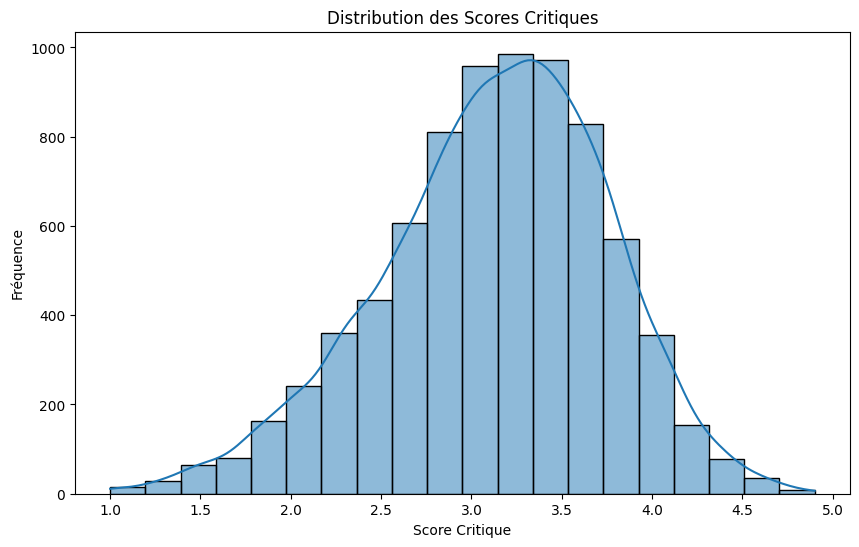

In [458]:
# 1.3. Visualisations Initiales
# Histogramme des scores critiques
plt.figure(figsize=(10, 6))
sns.histplot(allocine_df['critics_score'], bins=20, kde=True)
plt.title('Distribution des Scores Critiques')
plt.xlabel('Score Critique')
plt.ylabel('Fréquence')
plt.show()

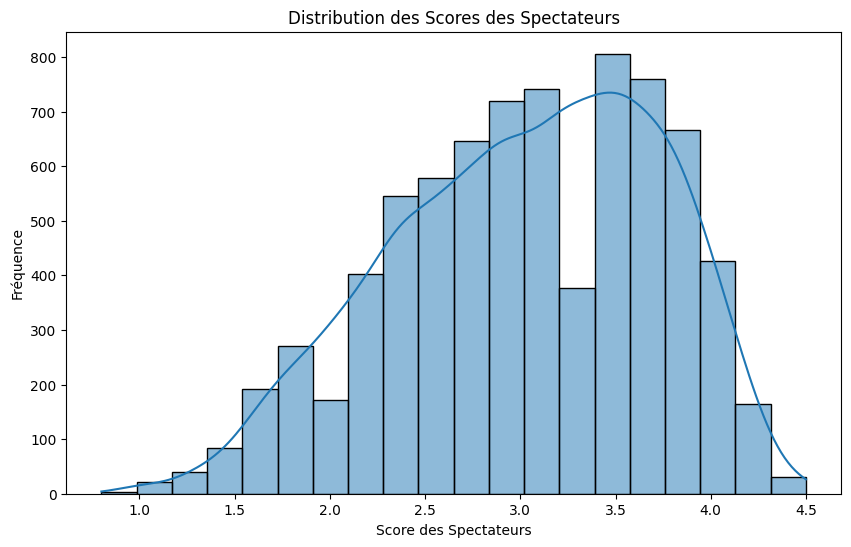

In [459]:
# Histogramme des scores des spectateurs
plt.figure(figsize=(10, 6))
sns.histplot(allocine_df['viewers_score'], bins=20, kde=True)
plt.title('Distribution des Scores des Spectateurs')
plt.xlabel('Score des Spectateurs')
plt.ylabel('Fréquence')
plt.show()

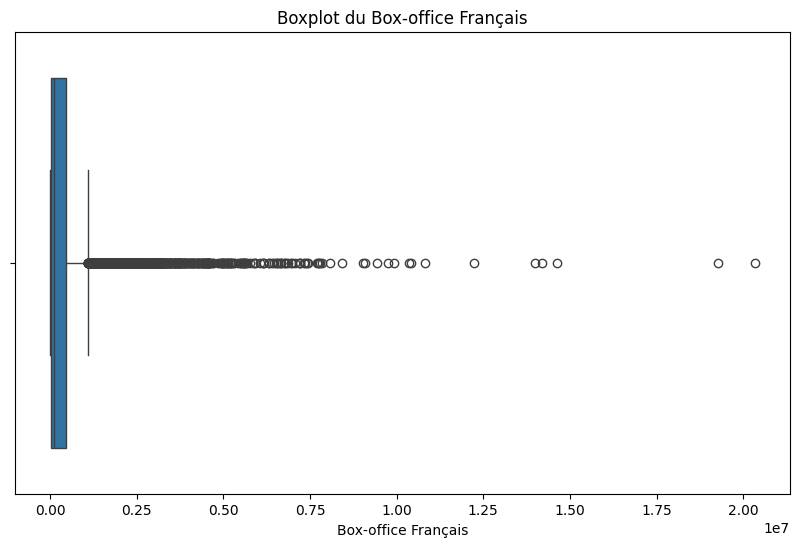

In [460]:
# Boxplot du box-office français
plt.figure(figsize=(10, 6))
sns.boxplot(x=allocine_df['french_boxoffice'])
plt.title('Boxplot du Box-office Français')
plt.xlabel('Box-office Français')
plt.show()

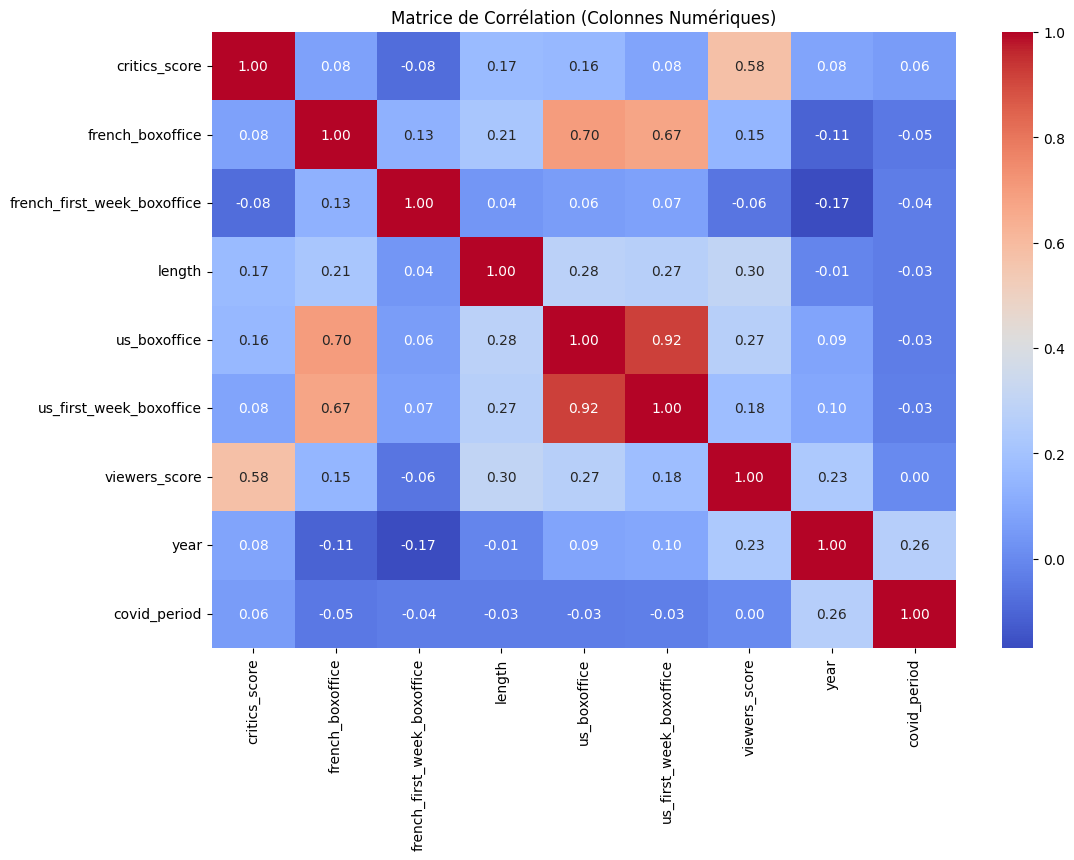

In [461]:
# Corrélations entre les variables numériques
plt.figure(figsize=(12, 8))

# Sélection des colonnes numériques
numeric_cols = allocine_df.select_dtypes(include=['number']).columns
correlation_matrix = allocine_df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de Corrélation (Colonnes Numériques)')
plt.show()

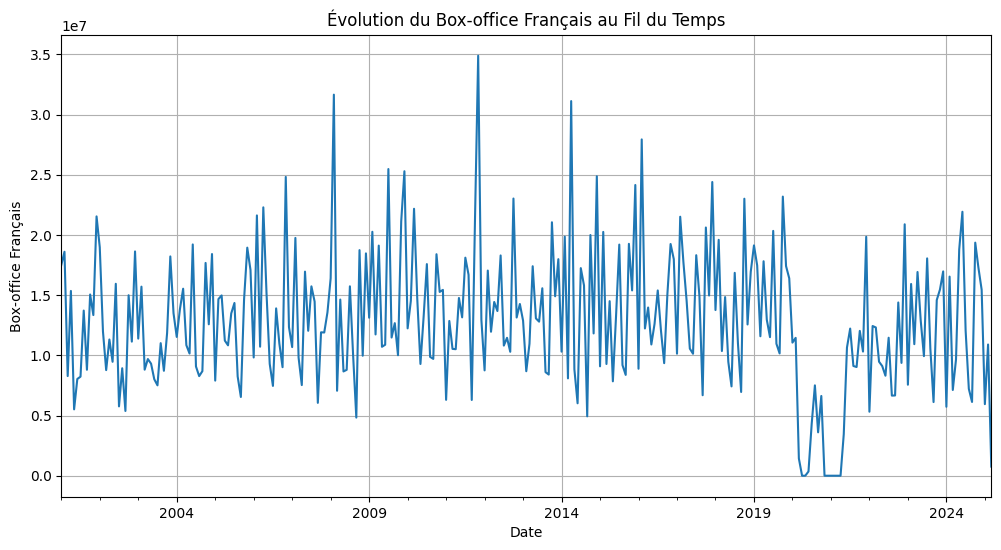

In [462]:
# 1. Analyse des Tendances Temporelles

# Groupement par mois et somme du box-office
monthly_boxoffice = allocine_df.resample('ME', on='date')['french_boxoffice'].sum()

plt.figure(figsize=(12, 6))
monthly_boxoffice.plot()
plt.title('Évolution du Box-office Français au Fil du Temps')
plt.xlabel('Date')
plt.ylabel('Box-office Français')
plt.grid()
plt.show()

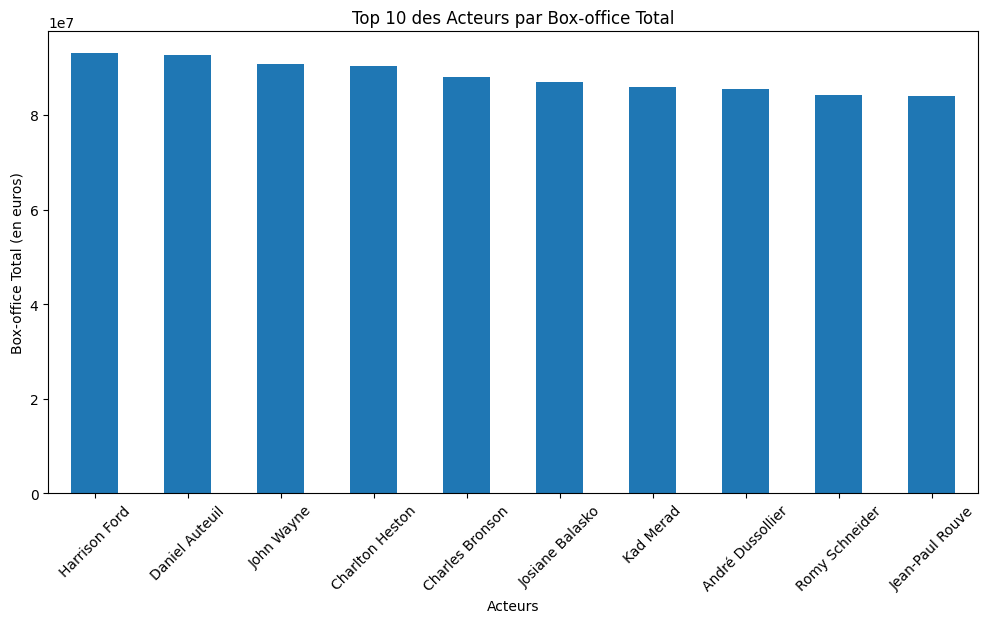

In [463]:
# 3. Impact des Acteurs et Réalisateurs
top_actors = actor_df.groupby('name')['boxoffice_total'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_actors.plot(kind='bar')
plt.title('Top 10 des Acteurs par Box-office Total')
plt.xlabel('Acteurs')
plt.ylabel('Box-office Total (en euros)')
plt.xticks(rotation=45)
plt.show()

In [464]:
# Création de 'main_genre' (si nécessaire)
allocine_df['main_genre'] = allocine_df['genre'].apply(lambda x: x if len(x) > 0 else None)

# Agrandir la figure pour éviter le troncement
plt.figure(figsize=(16, 8))  # Largeur augmentée à 16

# Créer le boxplot
sns.boxplot(x='main_genre', y='french_boxoffice', data=allocine_df)

# Ajuster la rotation et l'alignement des étiquettes
plt.xticks(rotation=45, ha='right')  # ha='right' aligne les étiquettes à droite
plt.title('Box-office par Genre Principal')
plt.xlabel('Genre')
plt.ylabel('Box-office Français (en euros)')

# Ajuster l'espacement pour éviter le troncement
plt.tight_layout()  # Optimise l'espacement
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 1600x800 with 0 Axes>

In [ ]:
# 5. Impact des Acteurs et Réalisateurs
# Top 10 des acteurs par box-office total
all_actors = [actor for sublist in allocine_df['actors'] for actor in sublist]
actor_counts = pd.Series(all_actors).value_counts().head(10)

plt.figure(figsize=(12, 6))
actor_counts.plot(kind='bar')
plt.title('Top 10 des Acteurs par Nombre de Films')
plt.xlabel('Acteurs')
plt.ylabel('Nombre de Films')
plt.xticks(rotation=45)
plt.grid()
plt.show()

TypeError: 'NoneType' object is not iterable

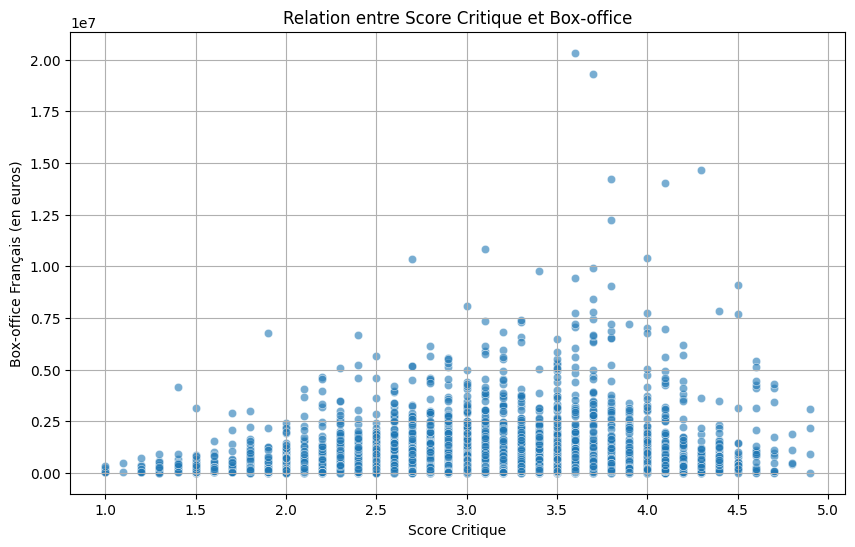

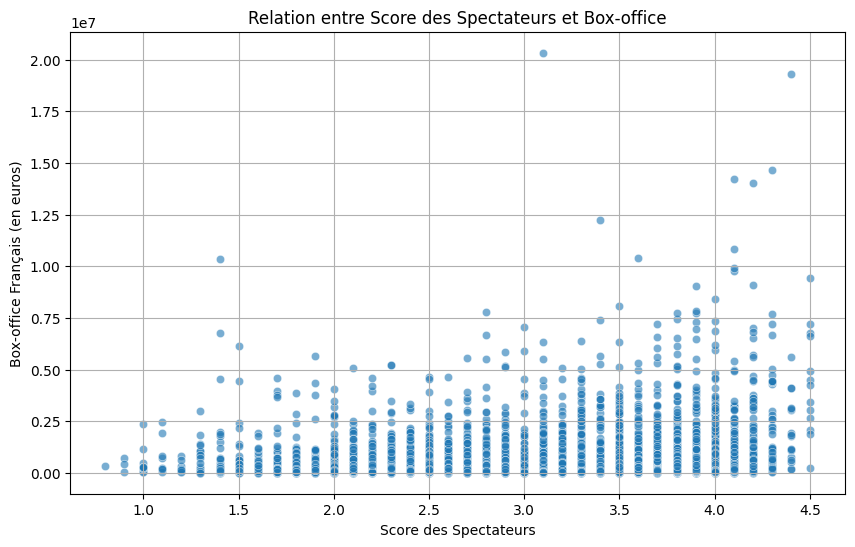

In [ ]:
# 6. Analyse des Scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critics_score', y='french_boxoffice', data=allocine_df, alpha=0.6)
plt.title('Relation entre Score Critique et Box-office')
plt.xlabel('Score Critique')
plt.ylabel('Box-office Français (en euros)')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='viewers_score', y='french_boxoffice', data=allocine_df, alpha=0.6)
plt.title('Relation entre Score des Spectateurs et Box-office')
plt.xlabel('Score des Spectateurs')
plt.ylabel('Box-office Français (en euros)')
plt.grid()
plt.show()

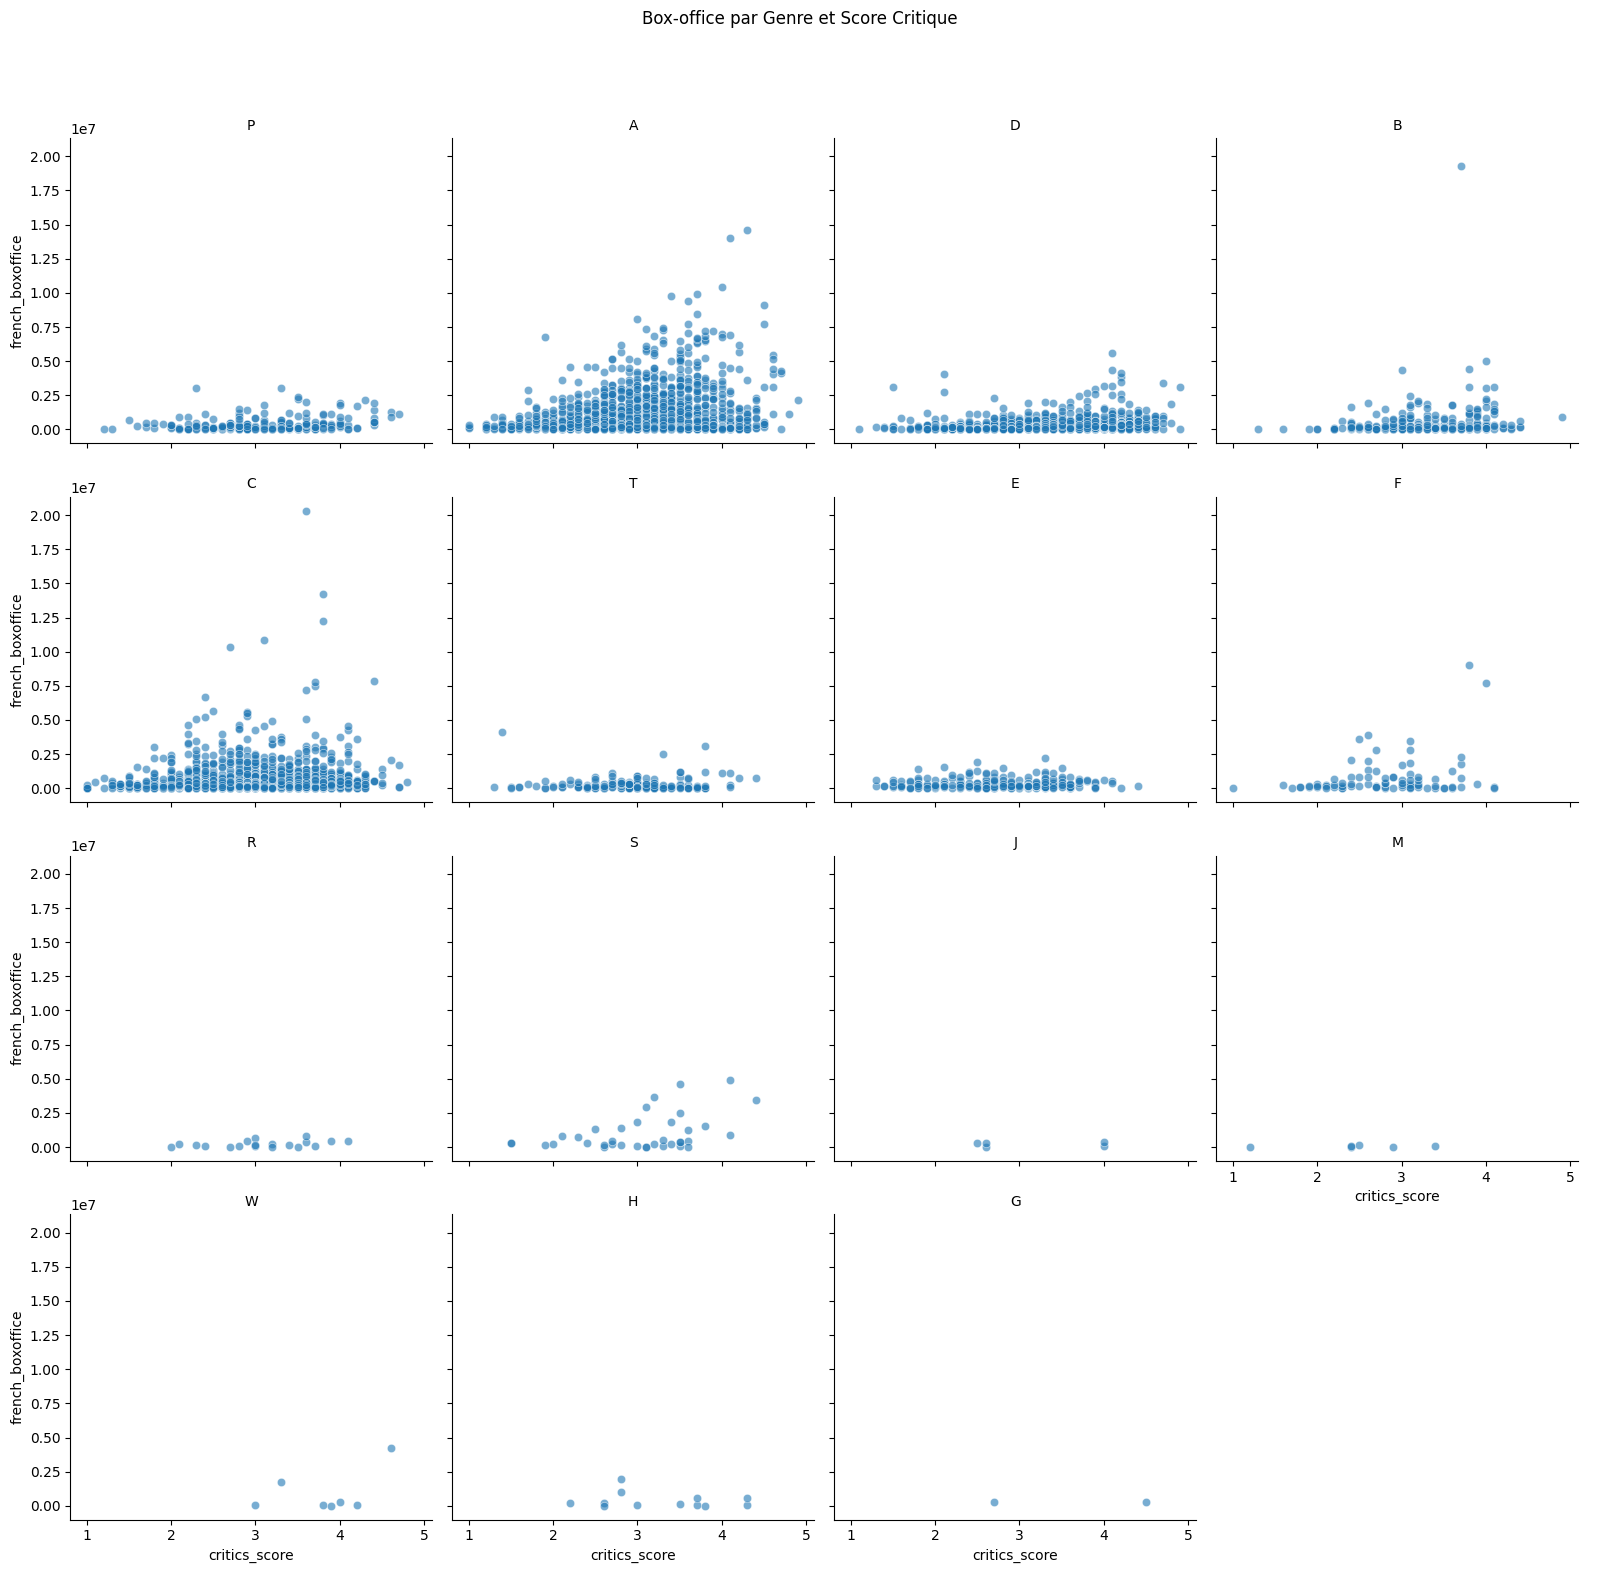

In [ ]:
# 7. Visualisations Avancées
g = sns.FacetGrid(allocine_df, col='main_genre', col_wrap=4, height=4)
g.map(sns.scatterplot, 'critics_score', 'french_boxoffice', alpha=0.6)
g.add_legend()
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Box-office par Genre et Score Critique')
plt.show()

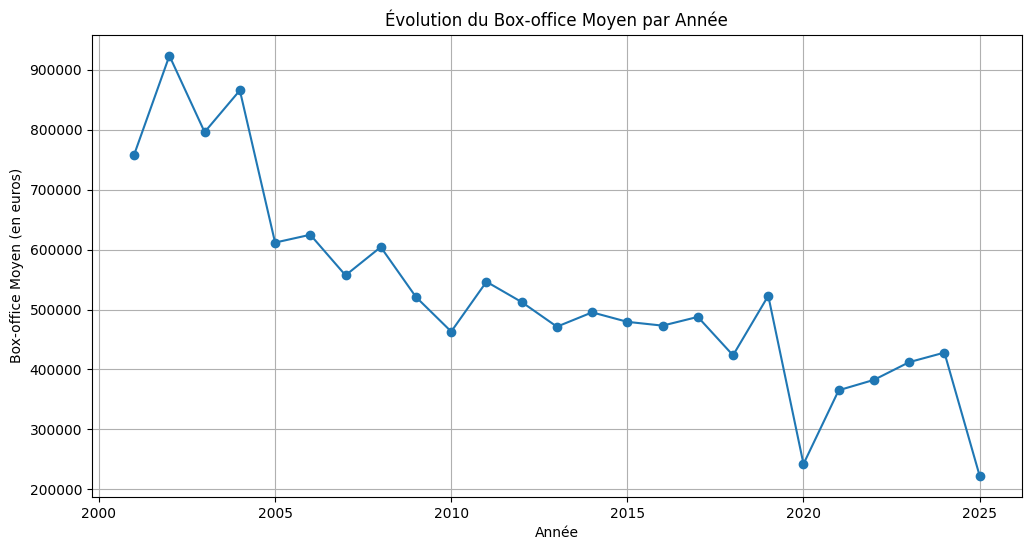

In [ ]:
# 3. Analyse Temporelle
# Convertir la colonne 'date' en datetime
allocine_df['date'] = pd.to_datetime(allocine_df['date'], errors='coerce')

# Extraire l'année
allocine_df['year'] = allocine_df['date'].dt.year

# Box-office moyen par année
yearly_boxoffice = allocine_df.groupby('year')['french_boxoffice'].mean()

# Visualisation
plt.figure(figsize=(12, 6))
yearly_boxoffice.plot(marker='o')
plt.title('Évolution du Box-office Moyen par Année')
plt.xlabel('Année')
plt.ylabel('Box-office Moyen (en euros)')
plt.grid()
plt.show()

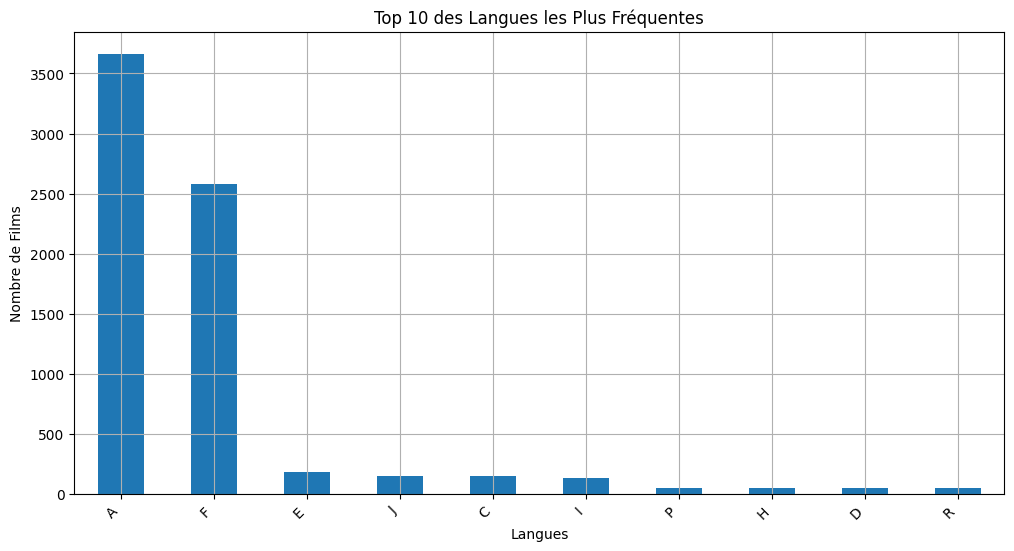

In [ ]:
# 8. Analyse des Langues
# Compter le nombre de films par langue
allocine_df['main_language'] = allocine_df['langage'].apply(lambda x: x[0] if len(x) > 0 else None)
language_counts = allocine_df['main_language'].value_counts().head(10)

plt.figure(figsize=(12, 6))
language_counts.plot(kind='bar')
plt.title('Top 10 des Langues les Plus Fréquentes')
plt.xlabel('Langues')
plt.ylabel('Nombre de Films')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()